In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("C:/Users/jhala/Downloads/train.csv")
test_df = pd.read_csv("C:/Users/jhala/Downloads/test.csv")

In [3]:
print(f'The Training Dataset contains, Rows: {train_df.shape[0]} & Columns: {train_df.shape[1]}')
print(f'The Test Dataset contains, Rows: {test_df.shape[0]} & Columns: {test_df.shape[1]}')

The Training Dataset contains, Rows: 891 & Columns: 12
The Test Dataset contains, Rows: 418 & Columns: 11


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.head().style.background_gradient(cmap='crest')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.100000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.050000,nan,S


In [6]:
numeric_features = train_df.select_dtypes(exclude=['object']).columns
numeric_features

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [7]:
numeric_df = train_df[numeric_features]
numeric_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [8]:
numeric_df.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.000000,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.000000,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.000000,2.308642,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,714.000000,29.699118,14.526497,0.420000,20.125000,28.000000,38.000000,80.000000
SibSp,891.000000,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.000000,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.000000,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200


In [9]:
corr_matrix = numeric_df.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


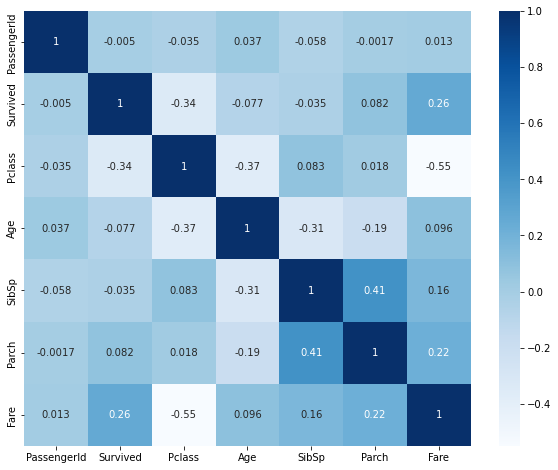

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues');

In [11]:
numeric_features_correlation_df = pd.DataFrame(numeric_df.corr().Survived)
abs(numeric_features_correlation_df).sort_values(by='Survived', ascending=False).style.background_gradient(cmap='Blues')

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


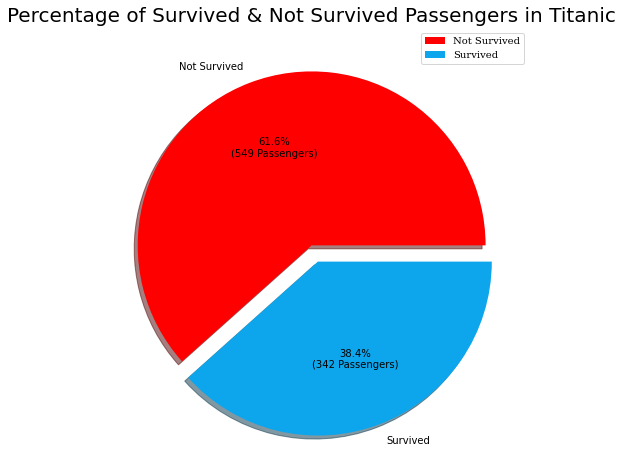

In [12]:
size = list(numeric_df['Survived'].value_counts())
labels = ['Not Survived', 'Survived']
colors = ['Red', '#0da6ec']
explode = [0, 0.1]

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d} Passengers)".format(pct, absolute)

plt.subplots(figsize=(8,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, 
        autopct = lambda pct: func(pct, size), labeldistance=1.1)

plt.title('Percentage of Survived & Not Survived Passengers in Titanic', fontsize = 20)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.legend()
plt.show()

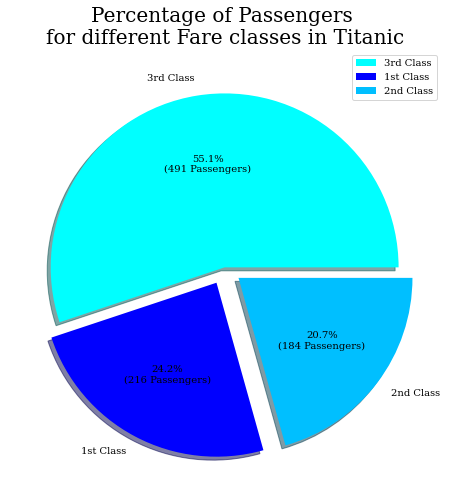

'\nPassenegers Of Pclass 1 has a very high priority to survive.\nThe number of Passengers in Pclass 3 were a lot higher than Pclass 1 and Pclass 2, but still the number of survival from pclass 3 is low compare to them.\nPclass 1 %survived is around 63%, for Pclass2 is around 48%, and Pclass3 survived is around 25%\nWe saw that Sex and Class is important on the survive.So,Lets check survival rate with Sex and Pclass Together.'

In [13]:
size = list(numeric_df['Pclass'].value_counts())
labels = ['3rd Class', '1st Class', '2nd Class']
colors = ['aqua', 'blue', 'deepskyblue']
explode = [0, 0.1, 0.1]

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d} Passengers)".format(pct, absolute)

plt.subplots(figsize=(8,8))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, 
        autopct = lambda pct: func(pct, size), labeldistance=1.1)

plt.title('Percentage of Passengers \nfor different Fare classes in Titanic', fontsize = 20)
plt.legend()
plt.show()


'''
Passenegers Of Pclass 1 has a very high priority to survive.
The number of Passengers in Pclass 3 were a lot higher than Pclass 1 and Pclass 2, but still the number of survival from pclass 3 is low compare to them.
Pclass 1 %survived is around 63%, for Pclass2 is around 48%, and Pclass3 survived is around 25%
We saw that Sex and Class is important on the survive.So,Lets check survival rate with Sex and Pclass Together.'''

In [14]:
color= ['Red', '#0da6ec']
def bar_plot(attribute, data, color, title, size, space, comparison = None, comparison_order=None):
    plt.figure(figsize=size)
    if comparison == None:
        ax = sns.countplot(x = attribute, data = data, palette=['Red', '#0da6ec'])
    else:
        ax = sns.countplot(x = attribute, hue = comparison, hue_order=comparison_order, data = data, palette=['Red', '#0da6ec'])
    total = len(data)
    
    for i in ax.patches:
        percentage = ' '*space + '{:.2f}%'.format((i.get_height()/total)*100)
        x = i.get_x()
        y = i.get_height()
        ax.annotate(percentage, (x,y))
    plt.title(title, size = 20)

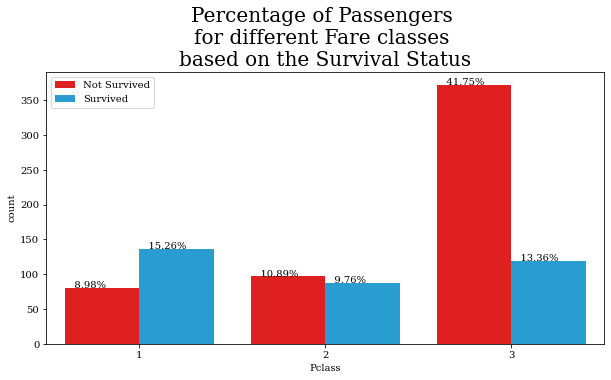

In [15]:
color= ['Red', '#0da6ec']
bar_plot('Pclass', numeric_df, 'cool', 
         "Percentage of Passengers \nfor different Fare classes \nbased on the Survival Status", 
         (10, 5), 3, 'Survived')

plt.legend(loc='upper left', labels=['Not Survived', 'Survived']);

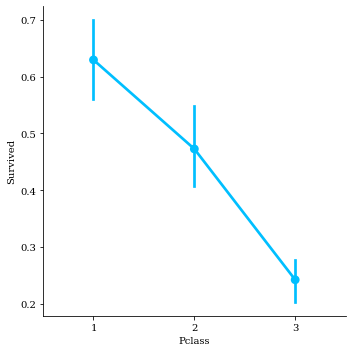

In [16]:
sns.catplot('Pclass','Survived',data=numeric_df, kind='point', color='deepskyblue');

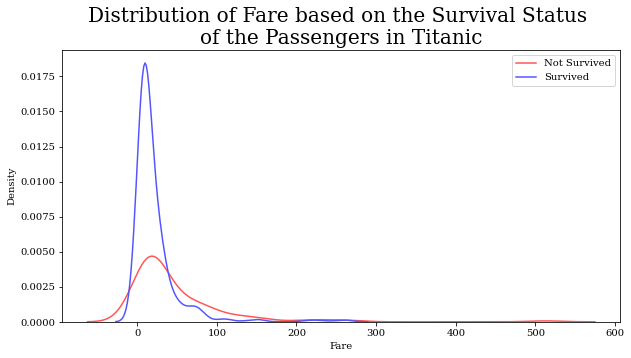

In [17]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=numeric_df, x='Fare', hue='Survived', palette="seismic");
plt.title("Distribution of Fare based on the Survival Status \nof the Passengers in Titanic", fontsize = 20);

plt.legend(loc='upper right', labels=['Not Survived', 'Survived']);

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


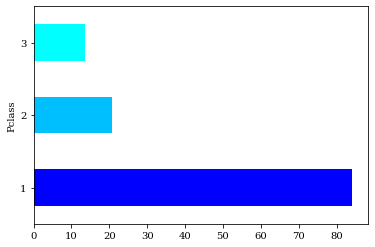

In [18]:
print(numeric_df.groupby('Pclass')['Fare'].mean())
numeric_df.groupby('Pclass')['Fare'].mean().plot.barh(color=[ 'blue', 'deepskyblue', 'aqua']);

In [19]:
def horizontal_bar_plot(feature, dataframe, color, title, adjust, figsize, hue=None):
  # Create barplot 
  plt.figure(figsize=figsize)

  if hue == None:
    ax = sns.countplot(y=feature, data=dataframe, palette=[ "midnightblue", 'blue', 'deepskyblue', 'aqua',"darkcyan","lawngreen","coral"])
  else:
    ax = sns.countplot(y=feature, data=dataframe, palette=color, hue=hue)

  # Annotate every single Bar with its value, based on it's width           
  for p in ax.patches:
      width = p.get_width()
      plt.text(p.get_width()+adjust[0], p.get_y()+adjust[1]*p.get_height(),
              '{} Passesngers\n[{:.2f}%]'.format(int(width), width*100/train_df[feature].shape[0]),
              ha='center', va='center')
      
  plt.title(title, fontsize=23);

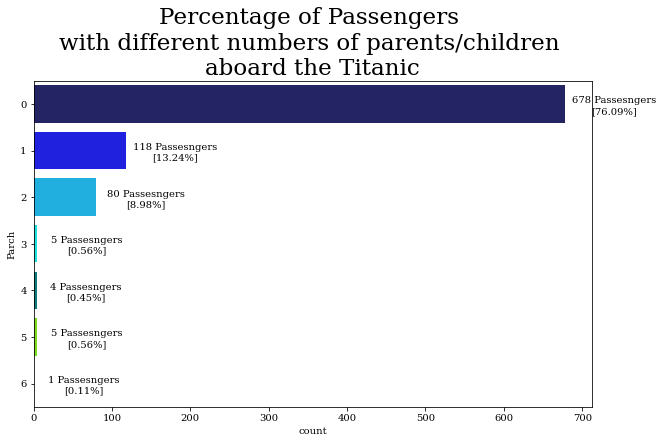

In [20]:
horizontal_bar_plot('Parch', numeric_df, 'cool', 
                    "Percentage of Passengers \nwith different numbers of parents/children \naboard the Titanic",
                    (63, 0.55), (10, 6))

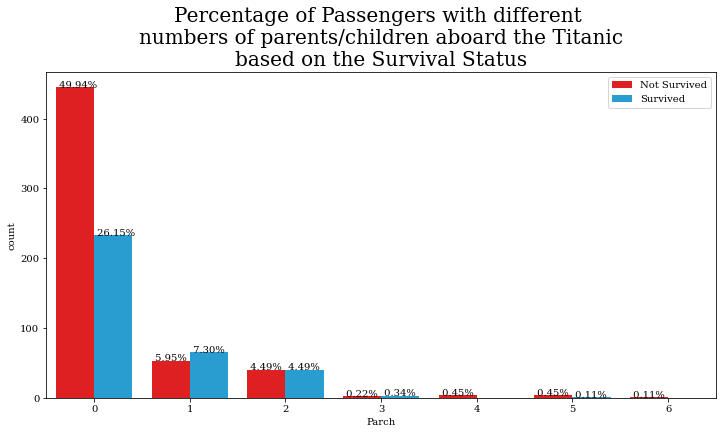

In [21]:
bar_plot('Parch', numeric_df, ['Red', '#0da6ec'],
         "Percentage of Passengers with different \nnumbers of parents/children aboard the Titanic\nbased on the Survival Status",
         (12, 6), 1, 'Survived')

plt.legend(loc='upper right', labels=['Not Survived', 'Survived']);

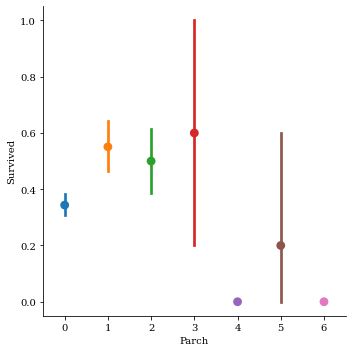

In [22]:
sns.catplot('Parch','Survived',data=numeric_df, kind='point', palette='tab10');

In [23]:
def Feature_Bin(attribute, data, comparison = None):
    
    new_df = data.copy()
    
    intervals = [0, 2, 4, 9, 15, 21, 44, 60, 80]
    labels = ['Infant', 'Toddler', 'Child', 'Teenager', 'Adult', 'Mid-Age', 'Middle Senior', 'Old-Age']

    a = 'Different {} Grouped_Value'.format(attribute)
    new_df[a] = pd.cut(x = new_df[attribute], bins = intervals, labels = labels, include_lowest=True)
    

    total = len(new_df[a])
    
    if comparison == None:
        plt.figure(figsize=(10,8))
        ax = sns.countplot(x = a, data = new_df, palette="crest");
        for i in ax.patches:
          percentage = '  {:.2f}%'.format((i.get_height()/total)*100)
          x=i.get_x() 
          y=i.get_height()
          ax.annotate(percentage, (x,y))
        
        plt.title('Percentage of Passengers \nfor different Age-Group in Titanic', size=20)

    else:
        # Create a subplot
        f, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
        
        # Create Percentage Plot
        ax = sns.countplot(x = a, data = new_df, hue = comparison, palette='Blues', ax=axes[0]);
        ax.set_title("Percentage of Passengers of different Age-Group \nbased on the Survival Status in Titanic").set_size(20)
        ax.legend(loc='upper right', labels=['Not Survived', 'Survived']);

        for i in ax.patches:
          percentage = '{:.2f}%'.format((i.get_height()/total)*100)
          x=i.get_x() 
          y=i.get_height()
          ax.annotate(percentage, (x,y))


        # Calculate Survival Rate
        percentage_value = [round(j, 2) for j in np.array([i.get_height()*100 for i in ax.patches])/total]
        non_survival_percentage_value = percentage_value[:8]
        survival_percentage_value = percentage_value[8:]
        survival_rate = [round(survival_percentage_value[i]*100/(survival_percentage_value[i] + non_survival_percentage_value[i]), 2) for i in range(8)]
        survival_rate_df = pd.DataFrame({'Age-Group':labels, 'Survival_Rate':survival_rate})

        # Create barplot of Survival Rate
        ax_one = sns.barplot(y='Survival_Rate', x='Age-Group', data=survival_rate_df, ax=axes[1], palette='crest')
        ax_one.set_title('Survival Rate of different Age-Group in Titanic').set_size(20)
        for i in ax_one.patches:
          percentage = '  {}%'.format(i.get_height())
          x=i.get_x() 
          y=i.get_height()
          ax_one.annotate(percentage, (x,y))

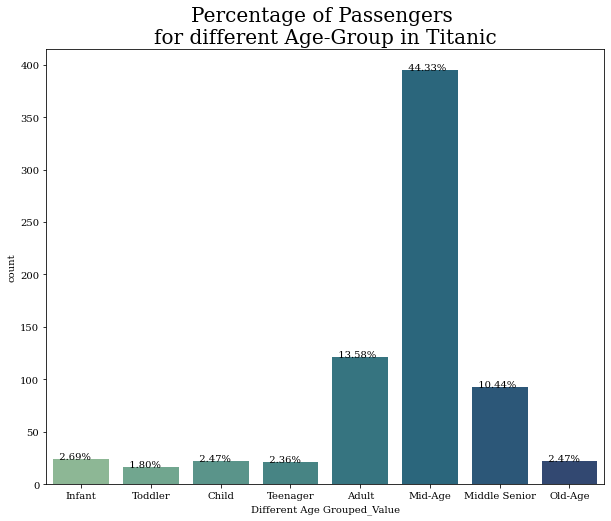

In [24]:
Feature_Bin('Age', numeric_df) 

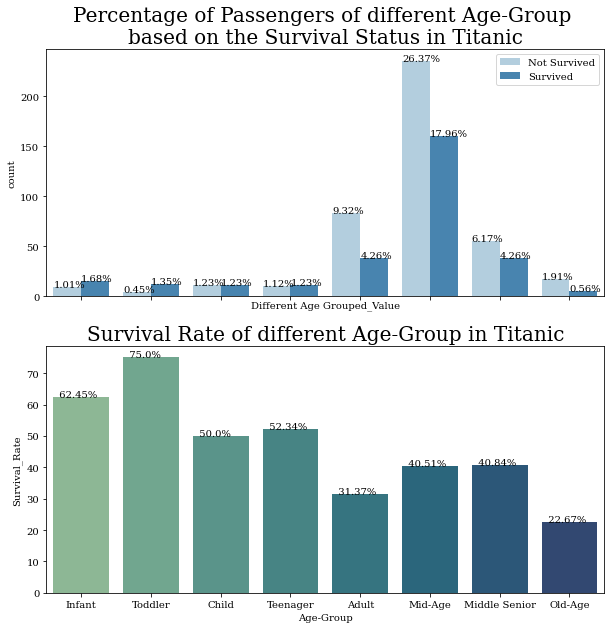

In [25]:
Feature_Bin('Age', numeric_df, 'Survived')

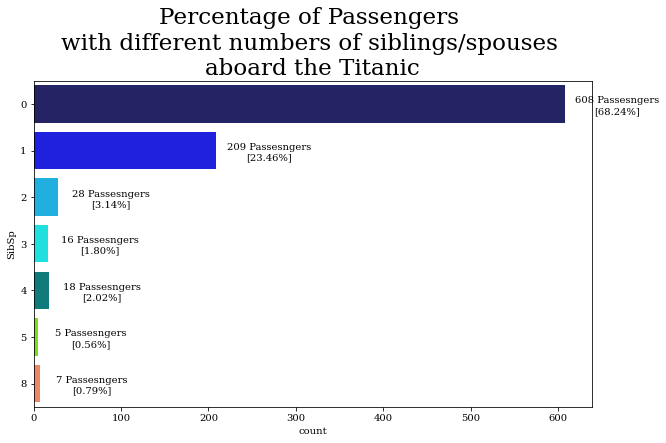

In [26]:
horizontal_bar_plot('SibSp', numeric_df, 'Set1', 
                    "Percentage of Passengers \nwith different numbers of siblings/spouses \naboard the Titanic",
                    (60, 0.55), (10, 6))

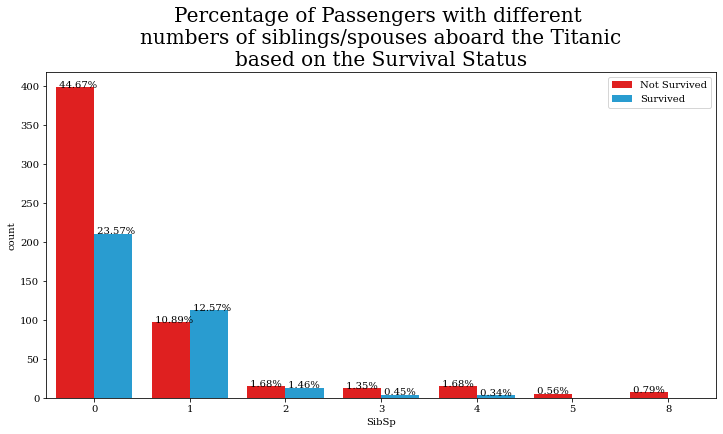

In [27]:
bar_plot('SibSp', numeric_df, ['Red', '#0da6ec'],
         "Percentage of Passengers with different \nnumbers of siblings/spouses aboard the Titanic\nbased on the Survival Status",
         (12, 6), 1, 'Survived')

plt.legend(loc='upper right', labels=['Not Survived', 'Survived']);

In [28]:
# create a list of all categorical features
categorical_features = train_df.select_dtypes(include=['object']).columns
categorical_features

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [29]:
# create the dataframe of all categorical features
categorical_df = train_df[categorical_features]

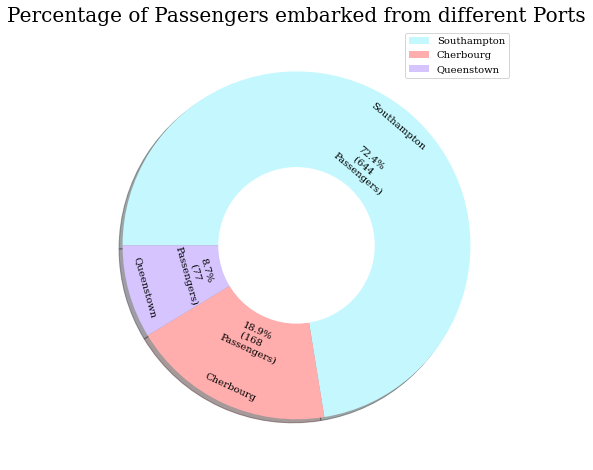

In [30]:
size = list(categorical_df['Embarked'].value_counts())
labels = ['Southampton', 'Cherbourg', 'Queenstown']
colors = ['#c4f8fe', '#ffadad', '#d5c4fe']

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals)))
    return "{:.1f}%\n({:d} \nPassengers)".format(pct, absolute)


fig1, ax = plt.subplots(figsize=(8,8))
patches, texts, autotexts = ax.pie(size, labels = labels, colors = colors, shadow = True, 
                                    autopct = lambda pct: func(pct, size), labeldistance=0.9,
                                    startangle=180, counterclock=False, rotatelabels=True,)

plt.setp(texts, rotation_mode="anchor", ha="center", va="center")
for t, at in zip(texts, autotexts):
    rot = t.get_rotation()
    t.set_rotation(rot + 90 + (1 - rot // 180) * 180)
    at.set_rotation(t.get_rotation())


# draw circle
centre_circle = plt.Circle((0, 0), 0.45, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)


plt.title('Percentage of Passengers embarked from different Ports', fontsize = 20)
plt.legend()
plt.show()

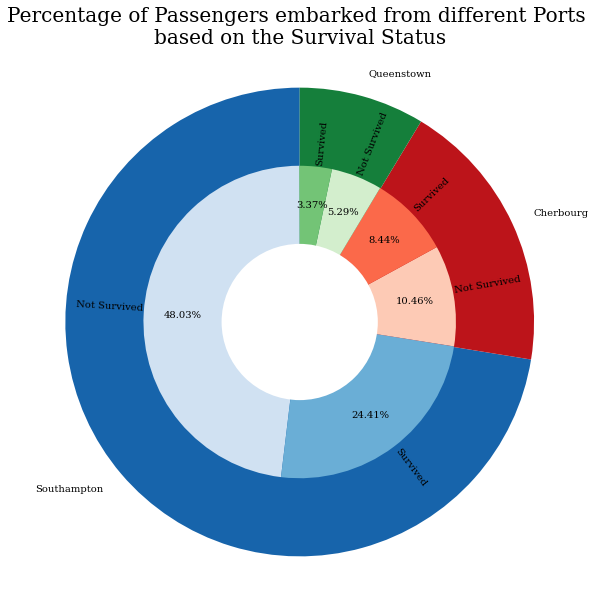

In [31]:
group_names = ['Southampton', 'Cherbourg', 'Queenstown']
group_size = list(categorical_df['Embarked'].value_counts())

subgroup_names = ['Not Survived', 'Survived']*3
subgroup_size = list(train_df.groupby(by='Embarked')['Survived'].value_counts())

# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

fig, ax = plt.subplots(figsize=(7,10))
ax.axis('equal')

plt.title('Percentage of Passengers embarked from different Ports \nbased on the Survival Status', fontsize = 20)

# First Ring (outside)
plt.pie(group_size, radius=1.5, labels=group_names, 
        colors=[a(0.8), b(0.8), c(0.8)], startangle=90)

# Second Ring (Inside)
plt.pie(subgroup_size, radius=1.3-0.3, 
                  labels=subgroup_names, labeldistance=1, 
                  colors=[b(0.2), b(0.5), c(0.2), c(0.5), a(0.2), a(0.5)], startangle=-9,
                  autopct = "%.2f%%", rotatelabels=True, pctdistance=0.75)
# draw circle
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.show()

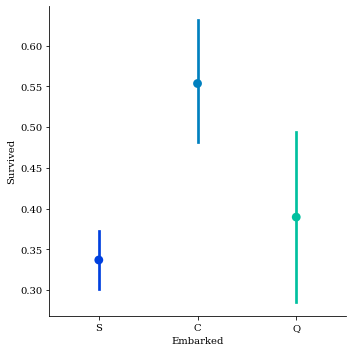

In [32]:
sns.catplot('Embarked','Survived',data=train_df, kind='point', palette='winter');

'The number of men on the ship is lot more than the number of women.\nBut, the number of women saved is almost twice the number of males saved.\nThe survival rates for a women on the ship is around 75% while that for men in around 18-19%.\nThis looks very important feature for prediction the Survived people'

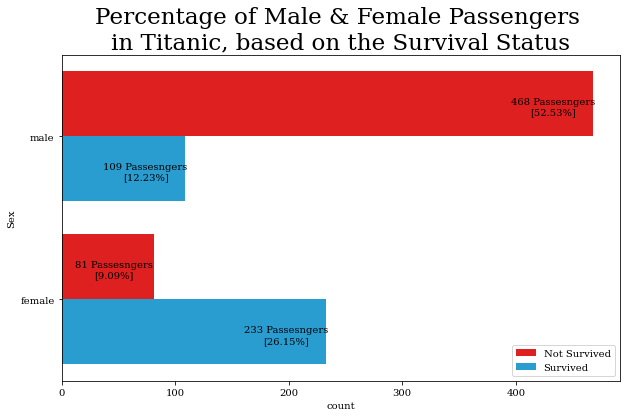

In [33]:
horizontal_bar_plot('Sex', train_df, ['Red', '#0da6ec'], 
                    'Percentage of Male & Female Passengers \nin Titanic, based on the Survival Status',
                    (-35, 0.55), (10, 6), 'Survived')

plt.legend(loc='lower right', labels=['Not Survived', 'Survived']);


'''The number of men on the ship is lot more than the number of women.
But, the number of women saved is almost twice the number of males saved.
The survival rates for a women on the ship is around 75% while that for men in around 18-19%.
This looks very important feature for prediction the Survived people'''

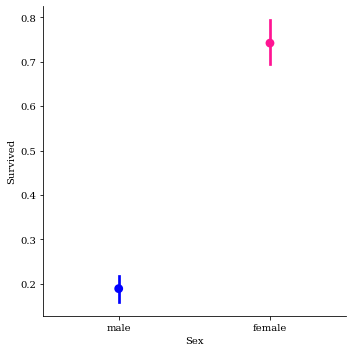

In [34]:
sns.catplot('Sex','Survived',data=train_df, kind='point', palette=['blue', "deeppink"]);

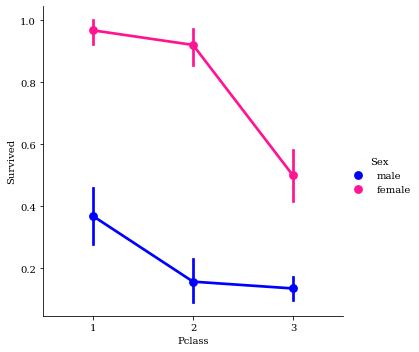

In [35]:
sns.catplot('Pclass','Survived',hue='Sex',data=train_df, kind='point', palette=['blue', "deeppink"]);

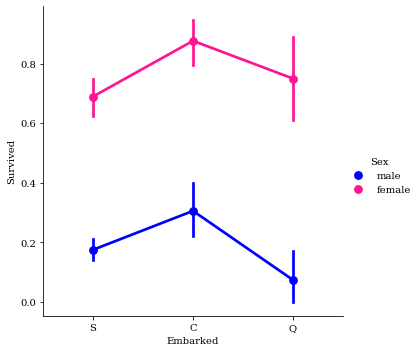

In [36]:
sns.catplot("Embarked", "Survived", hue="Sex", data=train_df, kind="point", palette=['blue', "deeppink"]);

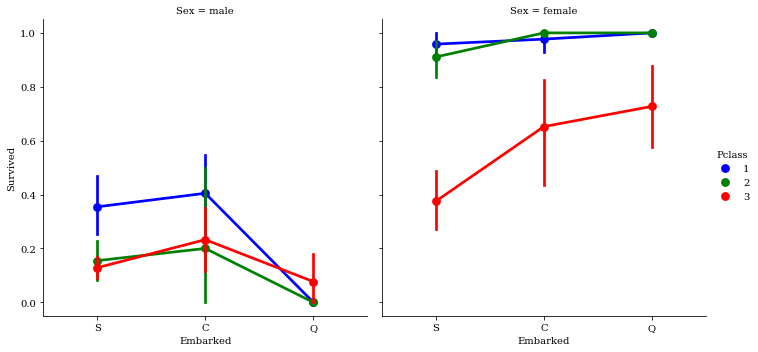

In [37]:
sns.catplot("Embarked", 'Survived', hue="Pclass", col="Sex", data=train_df, kind="point", palette=[ 'blue', 'green', 'red']);

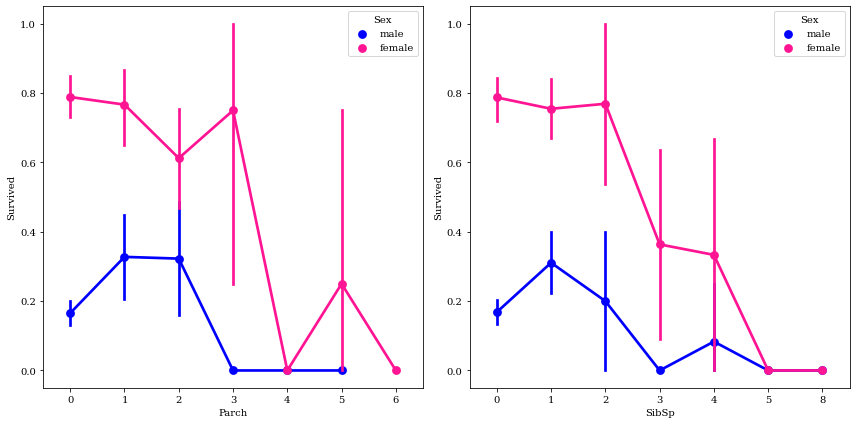

In [38]:
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(121)
g = sns.pointplot("Parch", 'Survived', hue="Sex", data=train_df, kind="point", palette=['blue', "deeppink"], ax=ax1);

ax2 = fig.add_subplot(122)
sns.pointplot("SibSp", 'Survived', hue="Sex", data=train_df, kind="point", palette=['blue', "deeppink"], ax=ax2);

plt.tight_layout()

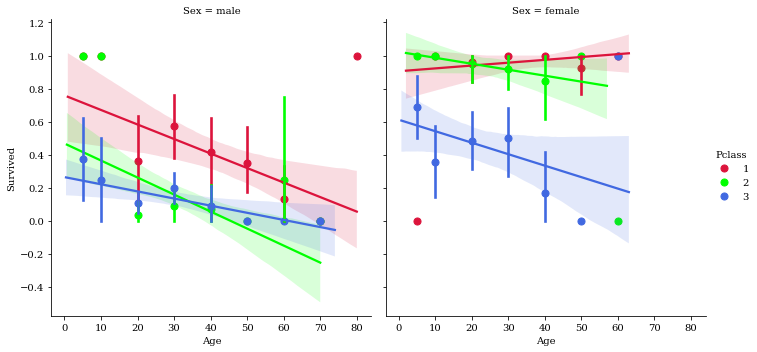

In [39]:
generations = [5, 10, 20, 30, 40, 50, 60, 70 , 80]
sns.lmplot("Age", "Survived",
            hue="Pclass", col="Sex",
            data=train_df,
            palette=["crimson","lime","royalblue"], x_bins=generations);

In [43]:
horizontal_bar_plot('Sex', categorical_df, 
                    'Percentage of Male & Female \nPassengers in Titanic',
                    (-102, 0.55), (10, 6))

TypeError: horizontal_bar_plot() missing 1 required positional argument: 'figsize'

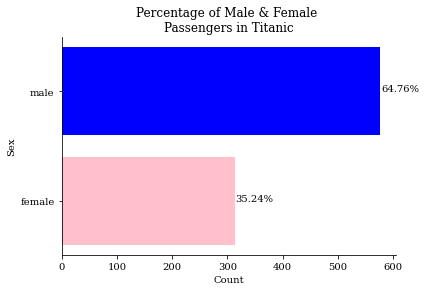

In [48]:
# Group the data by 'Sex'
grouped_df = categorical_df.groupby('Sex').size()

fig, ax = plt.subplots()
ax.barh(grouped_df.index, grouped_df.values, color=['pink', 'blue'])

# Calculate percentage for each category
percentage_df = (grouped_df / grouped_df.sum()) * 100

# Add percentage data above the bars
for i, v in enumerate(percentage_df):
    plt.text(grouped_df.values[i] + 1, i, str(round(v, 2)) + '%')

# Set the title and axis labels
plt.title('Percentage of Male & Female \nPassengers in Titanic')
plt.xlabel('Count')
plt.ylabel('Sex')
# Remove the box around the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()





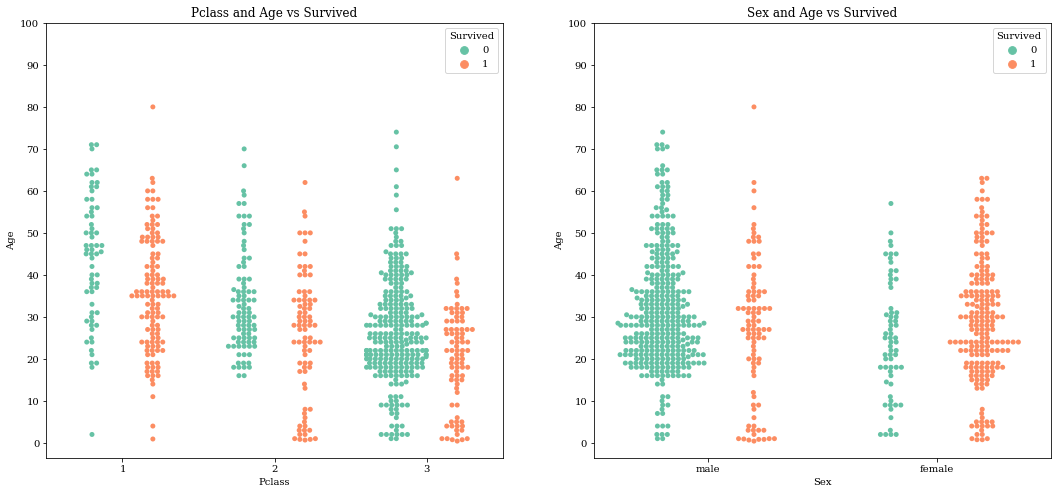

In [49]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.swarmplot("Pclass","Age", hue="Survived", data=train_df,split=True,ax=ax[0],palette='Set2')
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.swarmplot("Sex","Age", hue="Survived", data=train_df,split=True,ax=ax[1],palette='Set2')
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

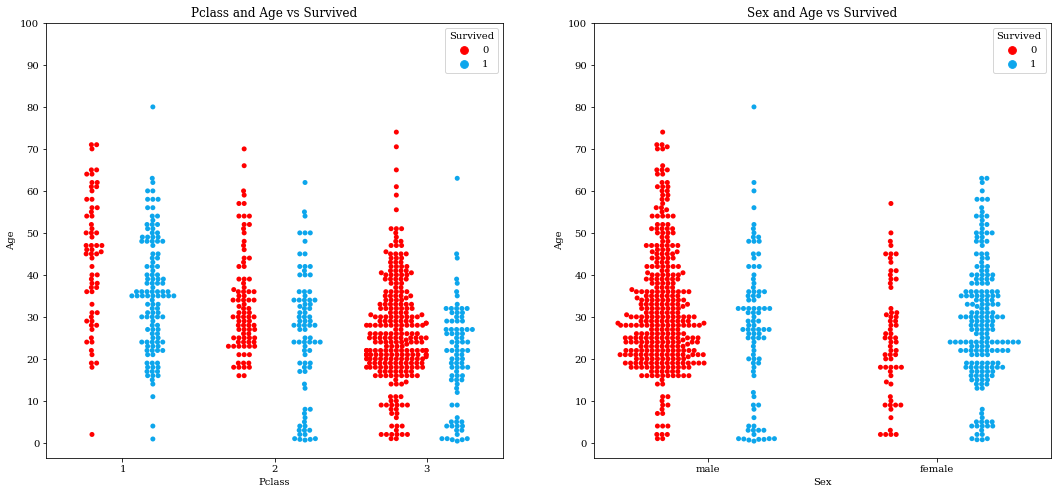

In [51]:
f,ax=plt.subplots(1,2,figsize=(18,8))

custom_colors = ['Red', '#0da6ec']  # custom color codes

sns.swarmplot("Pclass","Age", hue="Survived", data=train_df, split=True, ax=ax[0], palette=custom_colors)
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.swarmplot("Sex","Age", hue="Survived", data=train_df, split=True, ax=ax[1], palette=custom_colors)
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()


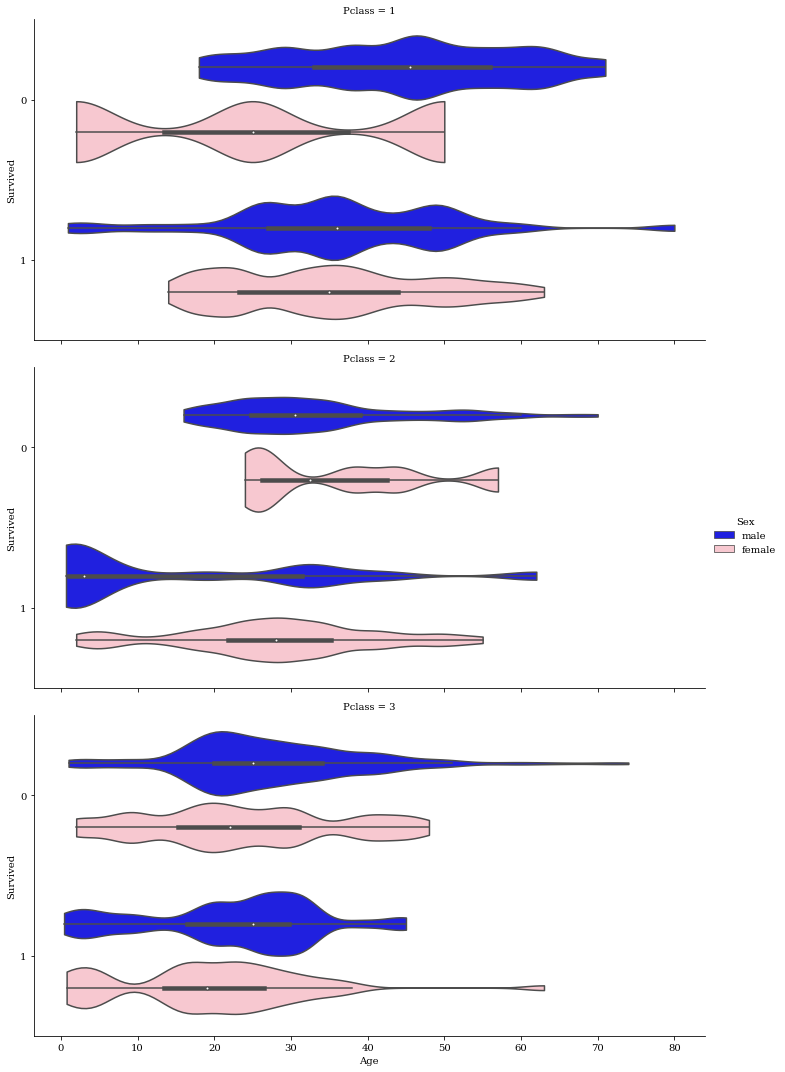

In [54]:
# Define a custom color palette
custom_palette = {"male": "blue", "female": "pink"}

# Plot the data with custom colors
sns.catplot(x="Age", y="Survived",
            hue="Sex", row="Pclass",
            data=train_df,
            orient="h", aspect=2, palette=custom_palette,
            kind="violin", dodge=True, cut=0, bw=.2)
